In [1]:
%matplotlib inline

In [2]:
# Section 1 - Loading our Libraries
import os
from io import StringIO
import requests
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

# Section 2 - Loading and Selecting Data
#df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
#df = pd.read_csv('/Users/marivi/Documents/GitHub/python-class/lectures/12-2020NewProject/countries-aggregated_csv.csv', parse_dates=['Date'])

url = "https://datahub.io/core/covid-19/r/countries-aggregated.csv"
req = requests.get(url)
data = StringIO(req.text)
df = pd.read_csv(data)

df_original = df 
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'Spain']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

/Users/marivi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


* In Section 1 of the Gist above, we’re loading our libraries. We’ll be making use of Pandas and Matplotlib for this tutorial.
* In Section 2, we read in the data into a dataframe df, and then select only the countries in our list countries. Selecting the data makes the resulting visualization a little more readable.
* In Section 3, we create a summary column that aggregates the total number of cases across our confirmed cases, recovered cases, and any individuals who have died as a result of COVID-19.

## Preparing the Dataframes for visualization

Now that we have our data stored within a dataframe, let’s prepare two further dataframes that will hold our data in crosstabs, which will allow us to more easily visualize the data.

In [3]:
# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'Spain':46750928 }
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000


Let’s explore what we did here in a bit of detail:

* In Section 4, we pivot our dataframe **df**, creating columns out of countries, with the number of cases as the data fields. This new dataframe is called **covid**. We then set the index of the dataframe to be the date and assign the country names to column headers.
* In Section 5, we copy our dataframe **covid** and call it **percapita**. We use a dictionary that is storing all our countries’ populations and divide each value by the population and multiply it by 100,000 to generate a number of cases per 100,000 people.

Let’s take a look at how our data has transformed from beginning up until now:


In [4]:
# Original data
df_original.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
# Cases by day
df.head()

Country,Canada,France,Germany,Spain,US,United Kingdom
Date,,,,,,
2020-01-22,0,0,0,0,1,0
2020-01-23,0,0,0,0,1,0
2020-01-24,0,2,0,0,2,0
2020-01-25,0,3,0,0,2,0
2020-01-26,1,3,0,0,5,0


In [6]:
# Cases per 100000
percapita.head()

,Canada,France,Germany,Spain,US,United Kingdom
Date,,,,,,
2020-01-22,0.000000,0.000000,0.0,0.0,0.000303,0.0
2020-01-23,0.000000,0.000000,0.0,0.0,0.000303,0.0
2020-01-24,0.000000,0.003066,0.0,0.0,0.000605,0.0
2020-01-25,0.000000,0.004598,0.0,0.0,0.000605,0.0
2020-01-26,0.002655,0.004598,0.0,0.0,0.001513,0.0


## Visualization — Cases over Time

This visualization will demonstrate the number of total cases over time in various countries:


AttributeError: Unknown property c

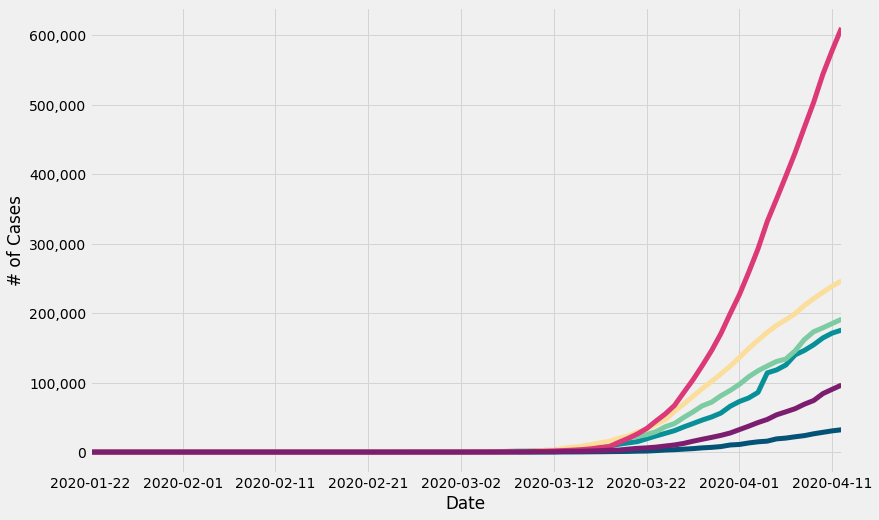

In [24]:
# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'Germany':'#089099', 'United Kingdom':'#7CCBA2', 'US':'#FCDE9C', 'France':'#DC3977', 'Spain':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), c = colors[country], s = country, weight = 'bold')
# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, Spain, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://datahub.io/core/covid-19/r/countries-aggregated.csv', fontsize = 10)


## Visualization: Cases per 100,000 people

In [26]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
    percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
    percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
#percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x110ad7f28> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'update'

AttributeError: 'NoneType' object has no attribute 'update'

<Figure size 864x576 with 1 Axes>